# Support Vector Machine Learning with PCA Preprocessing

We investigate how a dimensionality reduction technique can help optimize the number of features needed to feed a classification algorithm. In this case, the data corresponds to images of 40 different people, where we have 10 pictures of each person. 

Each picture has a resolution of 64x64 pixels, meaning that if dimensionality reduction is not applied, the classifier inputs 4064 features, used for prediction. With PCA this is reduced significantly to 150 (the first 150 principal components of the training data).

An *SVM* classifier is trained with the first 150 principal components of the data and an accuracy score is given.

In [1]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/davidcobos/scikit_learn_data


(400, 4096)

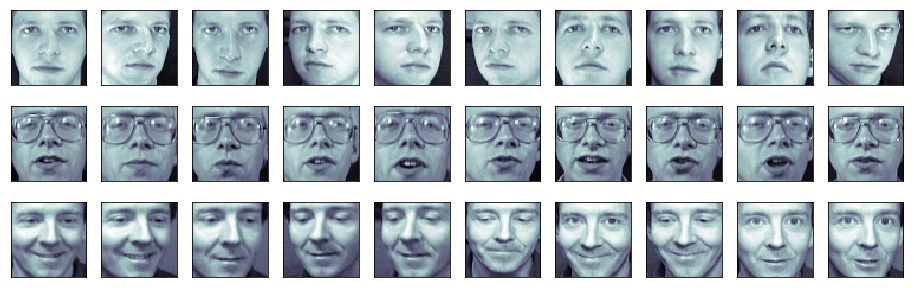

In [26]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 5))
# we plot images from the first 3 people
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [14]:
# we do the usual train/test split of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

# Preprocessing Bit: Dimensionality Reduction

In [36]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150)
pca.fit(X_train)

PCA(n_components=150)

In [37]:
# We project both the training and the test sets into the subspace generated by the first 150 principal components
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Learning Bit: Support Vector Machine

In [46]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

In [47]:
# We give an accuracy score of our classifier

from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test_pca)
accuracy_score(y_test,predictions)

0.83

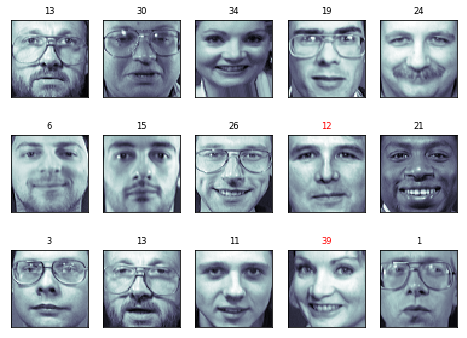

In [31]:
# We display 15 images in our test set with the corresponding target (index of face) above. 
# We paint it red if the prediction was wrong.

import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)